# Project Prep

The project will involve modeling a certain system that serves as a model for many real applications - a spring-mass-damper system. To start with we will model the non-forced (i.e. $F=0$) as shown below:

![image info](./spring_mass_damper.png)

The governing equation for determining the x versus time is: 

$\large \frac{d^2x}{dt^2} + 2 \gamma \frac{dx}{dt} + k^2 x = F(t)$

Here, $k$ is the spring constant, and $\gamma$ is the damping factor.

For now take the values above as follows:

$k^2 = $48 N/m/kg

$\gamma = $0.7 1/s

$x(0)=0$

$\frac{dx}{dt}\rvert_{t=0}$=0.2 m/s

$0 <= t <= 5$ s

$F(t) = 0$

### Assignment
By Wednesday Dec. 1, solve the 2nd order ODE above using RK3 for the specified values.






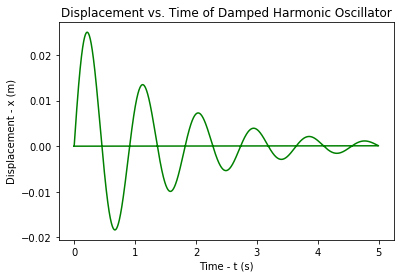

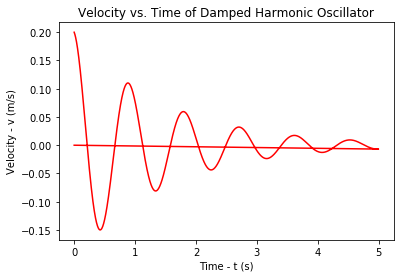

In [6]:
#IMPORT LIBRARIES
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#CLASSICAL RK CONSTANTS
c1 = (1./6)
c2 = (4./6)
c3 = (1./6)
a2 = (1./2)
a3 = 1
b21 = (1./2)
b31 = -1
b32 = 2

#SPECIFIED VALUES
k2 = 48     #squared spring constang, in N/m/kg
gam = 0.7   #damping factor, in Hz

#FUNCTIONS
##############
#Note:
    #t is independent
    #v is dependent
    #x is dependent
    #will need two RK functions- one for each ODE
##############
#right side of the original ODE function
#can plug in different values to test, makes code more general
F_over_m = lambda t: 0                           

#fx is only dependent on v
#send all the variables in, don't have to use them- is most general
#dx/dt, gives x vs t
#x is the primary dependent variable
fx = lambda t,x,v: v                                   

#fv dependent on x and v values
#send all the variables in, don't have to use them- is most general
#dv/dt, gives v vs t
#v is the primary dependent variable
fv = lambda t,x,v: (-2*gam*v) - (k2*x)

def RK3_x(ti, xi, vi, dt, c1, c2, c3, a2, a3, b21, b31, b32): 
    #gives xip1
    #have to send 3 values, but mainly need vi
        #ti is the indpendent variable, it will change
        #xi is the primary dependent variable, it will change
        #vi is another dependent variable but not primary for this function, so it will stay as vi
    K1 = fx(ti,xi,vi) 
    K2 = fx(ti + a2*dt, xi + b21*K1*dt, vi) 
    K3 = fx(ti + a3*dt, xi + b31*K1*dt + b32*K2*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3)*dt
    return xip1
    

def RK3_v(ti, xi, vi, dt, c1, c2, c3, a2, a3, b21, b31, b32): 
    #gives vip1
    #have to send 3 values, but mainly need vi
        #ti is the indpendent variable, it will change
        #vi is the primary dependent variable, it will change
        #xi is another dependent variable but not primary for this function, so it will stay as xi
    K1 = fv(ti,xi,vi) 
    K2 = fv(ti + a2*dt, xi, vi + b21*K1*dt) 
    K3 = fv(ti + a3*dt, xi, vi + b31*K1*dt + b32*K2*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3)*dt
    return vip1
##############

#FUNCTION VARIABLES
tiv = 0.0 #initial value for t, in s
tfv = 5.0 #final value for t, in s
viv = 0.2 #initial value for v @ t=0, in m/s
xiv = 0   #intial value for x @ t=0, in m
n = 5000 #number times to calculate RK/ number of time values
dt = (tfv-tiv)/n #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
t[0] = tiv
v[0] = viv
x[0] = xiv

#LOOP TO CALCULATE RK FOR EACH FUNCTION
#have already specified initial values, want to start loop @ 1
for i in range(1,n):
    t[i] = t[i-1] + dt                                                    #calculate the current timestamp for grahing
    x[i] = RK3_x(t[i-1], x[i-1], v[i-1], dt, c1, c2, c3, a2, a3, b21, b31, b32) #calculate xip1
    v[i] = RK3_v(t[i-1], x[i-1], v[i-1], dt, c1, c2, c3, a2, a3, b21, b31, b32) #calculate vip1
    

#GRAPHING THE FUNCTIONS
    #plt.plot(xcoord,ycoord)
        #can use c = "color" to change color of graph
    #plt.show() will show graphs separately
    #plt.title("title")
    #plt.xlabel("label")- repeat with y
    
    
plt.plot(t,x,c='green')
plt.title("Displacement vs. Time of Damped Harmonic Oscillator")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.show()

plt.plot(t,v,c='red')
plt.title("Velocity vs. Time of Damped Harmonic Oscillator")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.show()

